In [1]:
from curl_cffi import requests
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as ta
import seaborn as sns
sns.set_theme(style="whitegrid")
import pickle
import duckdb as db

In [2]:
# session = requests.Session(impersonate="chrome")

In [3]:
# ticker = "ADANIENT.NS"
# df_obj = yf.Ticker(ticker, session=session)
# data = df_obj.history(period="2y", interval="1d")

In [4]:
with open('../../data/n200_5yr_v3.pickle', 'rb') as f:
    data = pickle.load(f)

In [5]:
data["Date"].min(), data["Date"].max()

(Timestamp('2015-09-16 00:00:00'), Timestamp('2025-09-15 00:00:00'))

In [6]:
# data.reset_index(inplace=True, drop=True)

In [7]:
data.tail()

,Date,Open,High,Low,Close,Volume,Symbol
430042,2025-09-09,1010.000000,1038.699951,1009.200012,1035.599976,1228793,ZYDUSLIFE
430043,2025-09-10,1040.550049,1049.849976,1033.000000,1039.599976,1086228,ZYDUSLIFE
430044,2025-09-11,1039.599976,1048.000000,1030.300049,1043.599976,537049,ZYDUSLIFE
430045,2025-09-12,1048.300049,1054.599976,1042.000000,1044.750000,559927,ZYDUSLIFE
430046,2025-09-15,1047.000000,1047.000000,1033.050049,1036.900024,391505,ZYDUSLIFE


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430047 entries, 0 to 430046
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    430047 non-null  datetime64[ns]
 1   Open    430047 non-null  float32       
 2   High    430047 non-null  float32       
 3   Low     430047 non-null  float32       
 4   Close   430047 non-null  float32       
 5   Volume  430047 non-null  int32         
 6   Symbol  430047 non-null  string        
dtypes: datetime64[ns](1), float32(4), int32(1), string(1)
memory usage: 14.8 MB


In [9]:
def get_data(sym):
    return data[data["Symbol"]==sym].copy()

In [10]:
df = get_data("INFY")

In [11]:
itc=get_data("ITC")
tcs=get_data("TCS")
rvnl=get_data("RVNL")
jubl=get_data("JUBLFOOD")
hal =get_data("HAL")

In [12]:
combined = data.copy()

In [13]:
# combined = pd.concat([itc, tcs, rvnl, jubl,hal ], axis=0)
# combined = full_df.copy()
# combined

In [14]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430047 entries, 0 to 430046
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    430047 non-null  datetime64[ns]
 1   Open    430047 non-null  float32       
 2   High    430047 non-null  float32       
 3   Low     430047 non-null  float32       
 4   Close   430047 non-null  float32       
 5   Volume  430047 non-null  int32         
 6   Symbol  430047 non-null  string        
dtypes: datetime64[ns](1), float32(4), int32(1), string(1)
memory usage: 14.8 MB


In [15]:
# combined = pd.concat([itc, tcs ], axis=0).reset_index(drop=True)
# combined.info()

In [16]:
# grouped = combined.groupby("Symbol", group_keys=False)

In [17]:
# combined["atr"]=grouped.apply(lambda g: ta.ATR(g["High"], g["Low"], g["Close"], timeperiod=14),include_groups=False)

In [18]:
combined

,Date,Open,High,Low,Close,Volume,Symbol
0,2015-09-16,977.616089,989.007507,951.472412,957.844666,46055,ABB
1,2015-09-18,977.616089,987.392639,957.757324,978.969055,129547,ABB
2,2015-09-21,973.295166,991.539001,964.566040,966.486450,34553,ABB
3,2015-09-22,979.361938,979.361938,960.201599,962.602051,13607,ABB
4,2015-09-23,960.201355,964.478638,944.838135,959.677612,15296,ABB
...,...,...,...,...,...,...,...
430042,2025-09-09,1010.000000,1038.699951,1009.200012,1035.599976,1228793,ZYDUSLIFE
430043,2025-09-10,1040.550049,1049.849976,1033.000000,1039.599976,1086228,ZYDUSLIFE
430044,2025-09-11,1039.599976,1048.000000,1030.300049,1043.599976,537049,ZYDUSLIFE
430045,2025-09-12,1048.300049,1054.599976,1042.000000,1044.750000,559927,ZYDUSLIFE


In [19]:
# for n in [3, 7, 14, 30]:
# combined["atr_3"]=grouped.apply(lambda g: ta.ATR(g["High"], g["Low"], g["Close"], timeperiod=3),include_groups=False).stack(future_stack=True).reset_index( drop=True)/ combined["Close"]
# combined["atr_7"]=grouped.apply(lambda g: ta.ATR(g["High"], g["Low"], g["Close"], timeperiod=7),include_groups=False).stack(future_stack=True).reset_index( drop=True)/ combined["Close"]
# combined["atr_14"]=grouped.apply(lambda g: ta.ATR(g["High"], g["Low"], g["Close"], timeperiod=14),include_groups=False).stack(future_stack=True).reset_index( drop=True)/combined["Close"]


In [20]:
# combined["atr_7"] = combined["atr_7"] / combined["Close"]
# combined["atr_14"] = combined["atr_14"] / combined["Close"]
# combined["atr_3"] = combined["atr_3"] / combined["Close"]

In [21]:
combined

,Date,Open,High,Low,Close,Volume,Symbol
0,2015-09-16,977.616089,989.007507,951.472412,957.844666,46055,ABB
1,2015-09-18,977.616089,987.392639,957.757324,978.969055,129547,ABB
2,2015-09-21,973.295166,991.539001,964.566040,966.486450,34553,ABB
3,2015-09-22,979.361938,979.361938,960.201599,962.602051,13607,ABB
4,2015-09-23,960.201355,964.478638,944.838135,959.677612,15296,ABB
...,...,...,...,...,...,...,...
430042,2025-09-09,1010.000000,1038.699951,1009.200012,1035.599976,1228793,ZYDUSLIFE
430043,2025-09-10,1040.550049,1049.849976,1033.000000,1039.599976,1086228,ZYDUSLIFE
430044,2025-09-11,1039.599976,1048.000000,1030.300049,1043.599976,537049,ZYDUSLIFE
430045,2025-09-12,1048.300049,1054.599976,1042.000000,1044.750000,559927,ZYDUSLIFE


In [52]:
def add_indicators(df: pd.DataFrame) -> pd.DataFrame:
    grouped = df.groupby("Symbol", group_keys=False)

    # --- Trend / Moving Averages ---
    df["EMA_9"]   = grouped["Close"].transform(lambda x: ta.EMA(x, 9))
    df["EMA_30"]  = grouped["Close"].transform(lambda x: ta.EMA(x, 30))
    df["EMA_100"] = grouped["Close"].transform(lambda x: ta.EMA(x, 100))

    # --- Directional Indicators ---
    df["plus_di"]   = grouped.apply(lambda g: ta.PLUS_DI(g["High"], g["Low"], g["Close"], timeperiod=14),include_groups=False)
    df["minus_di"]  = grouped.apply(lambda g: ta.MINUS_DI(g["High"], g["Low"], g["Close"], timeperiod=14),include_groups=False)
    df["adx"]       = grouped.apply(lambda g: ta.ADX(g["High"], g["Low"], g["Close"], timeperiod=14),include_groups=False)


    # --- Oscillators / Momentum ---
    df["rsi"]    = grouped["Close"].transform(lambda x: ta.RSI(x, 14))
    df["roc_3"]  = grouped["Close"].transform(lambda x: ta.ROC(x, 3))
    df["roc_7"]  = grouped["Close"].transform(lambda x: ta.ROC(x, 7))
    df["roc_14"] = grouped["Close"].transform(lambda x: ta.ROC(x, 14))
    df["roc_30"] = grouped["Close"].transform(lambda x: ta.ROC(x, 30))

    # --- Volatility (ATR normalized by price) ---
    for n in [3, 7, 14, 30]:
        df[f"atr_{n}"]=grouped.apply(lambda g: ta.ATR(g["High"], g["Low"], g["Close"], timeperiod=n),include_groups=False)

    for n in [3, 7, 14, 30]:
        df[f"atr_{n}"] = df[f"atr_{n}"] / df["Close"]

    # --- Returns ---
    df["return_1d"]  = grouped["Close"].transform(lambda x: x.pct_change(1))
    df["return_3d"]  = grouped["Close"].transform(lambda x: x.pct_change(3))
    df["return_7d"]  = grouped["Close"].transform(lambda x: x.pct_change(7))
    df["return_14d"] = grouped["Close"].transform(lambda x: x.pct_change(14))
    df["return_30d"] = grouped["Close"].transform(lambda x: x.pct_change(30))

    # --- Volatility (rolling std of returns) ---
    df["vol_3d"]  = grouped["return_1d"].transform(lambda x: x.rolling(3).std())
    df["vol_7d"]  = grouped["return_1d"].transform(lambda x: x.rolling(7).std())
    df["vol_14d"] = grouped["return_1d"].transform(lambda x: x.rolling(14).std())
    df["vol_30d"] = grouped["return_1d"].transform(lambda x: x.rolling(30).std())

    # --- Price Ratios ---
    df["ema_9_ratio"]   = df["Close"] / df["EMA_9"]
    df["ema_30_ratio"]  = df["Close"] / df["EMA_30"]
    df["ema_100_ratio"] = df["Close"] / df["EMA_100"]

    # --- Rolling Highs normalized by Close ---
    df["3_days_high"]  = grouped["High"].transform(lambda x: x.rolling(3).max())  / df["Close"]
    df["7_days_high"]  = grouped["High"].transform(lambda x: x.rolling(7).max())  / df["Close"]
    df["14_days_high"] = grouped["High"].transform(lambda x: x.rolling(14).max()) / df["Close"]
    df["30_days_high"] = grouped["High"].transform(lambda x: x.rolling(30).max()) / df["Close"]

    # macd
    def macd_apply(x):
        macd, macd_signal, macd_hist = ta.MACD(
            x, fastperiod=12, slowperiod=26, signalperiod=9
        )
        return pd.DataFrame(
            {"macd": macd, "macd_signal": macd_signal, "macd_hist": macd_hist},
            index=x.index
        )

    macd_df = grouped["Close"].apply(macd_apply)
    # dvide by close price to normalize
    macd_df["macd"] = macd_df["macd"] / df["Close"]
    macd_df["macd_signal"] = macd_df["macd_signal"] / df["Close"]
    macd_df["macd_hist"] = macd_df["macd_hist"] / df["Close"]
    df = df.join(macd_df)

    return df

modified = add_indicators(combined)

In [53]:
modified[modified["Symbol"]=="ITC"]

,Date,Open,High,Low,Close,Volume,Symbol,EMA_9,EMA_30,EMA_100,...,ema_9_ratio,ema_30_ratio,ema_100_ratio,3_days_high,7_days_high,14_days_high,30_days_high,macd,macd_signal,macd_hist
215551,2015-09-16,155.025314,157.068649,154.319885,156.728088,5589585,ITC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215552,2015-09-18,158.114639,159.574158,153.127945,154.709091,12828255,ITC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215553,2015-09-21,153.930664,154.368530,152.471146,152.884674,6798498,ITC,NaN,NaN,NaN,...,NaN,NaN,NaN,1.043755,NaN,NaN,NaN,NaN,NaN,NaN
215554,2015-09-22,153.687424,154.830704,150.817032,151.863022,14938507,ITC,NaN,NaN,NaN,...,NaN,NaN,NaN,1.050777,NaN,NaN,NaN,NaN,NaN,NaN
215555,2015-09-23,149.357513,155.219925,149.357513,153.784729,11655003,ITC,NaN,NaN,NaN,...,NaN,NaN,NaN,1.009332,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218012,2025-09-09,408.500000,410.950012,407.399994,410.049988,8825896,ITC,408.593305,409.601724,414.724819,...,1.003565,1.001094,0.988728,1.016949,1.041336,1.041336,1.041336,-0.002014,-0.004102,0.002088
218013,2025-09-10,411.000000,413.700012,408.950012,413.049988,9252397,ITC,409.484642,409.824193,414.691654,...,1.008707,1.007871,0.996041,1.001574,1.033773,1.033773,1.033773,-0.000949,-0.003448,0.002499
218014,2025-09-11,413.049988,416.700012,412.450012,415.049988,8274406,ITC,410.597711,410.161341,414.698750,...,1.010843,1.011919,1.000847,1.003975,1.028792,1.028792,1.028792,0.000269,-0.002691,0.002960
218015,2025-09-12,415.350006,417.049988,412.850006,413.750000,7803379,ITC,411.228169,410.392867,414.679963,...,1.006132,1.008180,0.997757,1.007976,1.032024,1.032024,1.032024,0.000970,-0.001966,0.002936


In [54]:
# df = data.copy()[["Open", "High", "Low", "Close"]]

In [55]:
df = modified.copy()

In [56]:
# df["EMA_9"] = ta.EMA(df["Close"], timeperiod=9)
# df["EMA_30"] = ta.EMA(df["Close"], timeperiod=30)
# df["EMA_100"] = ta.EMA(df["Close"], timeperiod=100)
# df['plus_di'] = ta.PLUS_DI(df['High'], df['Low'], df['Close'], timeperiod=14)
# df['minus_di'] = ta.MINUS_DI(df['High'], df['Low'], df['Close'], timeperiod=14)
# df['adx'] = ta.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
# # other indicators can be added here

# df["rsi"] = ta.RSI(df["Close"], timeperiod=14)
# df["roc_3"] = ta.ROC(df["Close"], timeperiod=3)
# df["roc_7"] = ta.ROC(df["Close"], timeperiod=7)
# df["roc_14"] = ta.ROC(df["Close"], timeperiod=14)
# df["roc_30"] = ta.ROC(df["Close"], timeperiod=30)

# df["atr_3"] = ta.ATR(df["High"], df["Low"], df["Close"], timeperiod=3)/df["Close"]
# df["atr_7"] = ta.ATR(df["High"], df["Low"], df["Close"], timeperiod=7)/df["Close"]
# df["atr_14"] = ta.ATR(df["High"], df["Low"], df["Close"], timeperiod=14)/df["Close"]
# df["atr_30"] = ta.ATR(df["High"], df["Low"], df["Close"], timeperiod=30)/df["Close"]

# df['return_1d'] = df['Close'].pct_change()

# df['return_3d'] = df['Close'].pct_change(3)
# df['return_7d'] = df['Close'].pct_change(7)
# df['return_14d'] = df['Close'].pct_change(14)
# df['return_30d'] = df['Close'].pct_change(30)

# df['vol_3d'] = df['return_1d'].rolling(3).std()
# df['vol_7d'] = df['return_1d'].rolling(7).std()
# df['vol_14d'] = df['return_1d'].rolling(14).std()
# df['vol_30d'] = df['return_1d'].rolling(30).std()


# df["ema_9_ratio"] = df["Close"]/df["EMA_9"]
# df["ema_30_ratio"] = df["Close"]/df["EMA_30"]
# df["ema_100_ratio"] = df["Close"]/df["EMA_100"]

# df["3_days_high"] = df["High"].rolling(3).max()/df["Close"]
# df["7_days_high"] = df["High"].rolling(7).max()/df["Close"]
# df["14_days_high"] = df["High"].rolling(14).max()/df["Close"]
# df["30_days_high"] = df["High"].rolling(30).max()/df["Close"]
# # df["52_weeks_high"] = df["High"].rolling(252).max()





In [57]:
def check_if_uptrend(row):
    ema_check = 0
    dmi_check = 0
    if row['EMA_9'] > row['EMA_30'] > row['EMA_100']:
        ema_check = 1
    if row['plus_di'] > row['minus_di'] and row['adx'] > 30:
        dmi_check = 1
    if ema_check and dmi_check:
        return 1
    else:
        return -1

def check_if_downtrend(row):
    ema_check = 0
    dmi_check = 0
    if row['EMA_9'] < row['EMA_30'] < row['EMA_100']:
        ema_check = 1
    if row['plus_di'] < row['minus_di'] and row['adx'] > 30:
        dmi_check = 1
    if ema_check or dmi_check:
        return 1
    else:
        return 0

In [58]:
df = df.dropna().copy()

In [59]:
df["is_uptrend"] = df.apply(check_if_uptrend, axis=1)
df["signal"] = df["is_uptrend"].where(df["is_uptrend"] != df["is_uptrend"].shift(), 0)
# df["date"] = df.index

In [60]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Symbol', 'EMA_9',
       'EMA_30', 'EMA_100', 'plus_di', 'minus_di', 'adx', 'rsi', 'roc_3',
       'roc_7', 'roc_14', 'roc_30', 'atr_3', 'atr_7', 'atr_14', 'atr_30',
       'return_1d', 'return_3d', 'return_7d', 'return_14d', 'return_30d',
       'vol_3d', 'vol_7d', 'vol_14d', 'vol_30d', 'ema_9_ratio', 'ema_30_ratio',
       'ema_100_ratio', '3_days_high', '7_days_high', '14_days_high',
       '30_days_high', 'macd', 'macd_signal', 'macd_hist', 'is_uptrend',
       'signal'],
      dtype='object')

In [61]:
to_drop = [ 'Open', 'High', 'Low', 'Volume', 'EMA_9', 'EMA_30', 'EMA_100', 'is_uptrend', 'signal']

In [62]:
df

,Date,Open,High,Low,Close,Volume,Symbol,EMA_9,EMA_30,EMA_100,...,ema_100_ratio,3_days_high,7_days_high,14_days_high,30_days_high,macd,macd_signal,macd_hist,is_uptrend,signal
99,2016-02-15,921.793396,977.659668,921.793396,967.315674,128338,ABB,937.549736,926.367496,980.368770,...,0.986686,1.015206,1.051482,1.081081,1.081081,0.007246,-0.002294,0.009540,-1,-1
100,2016-02-16,975.040955,989.182129,948.504456,956.797119,117886,ABB,941.399213,928.330697,979.902004,...,0.976421,1.033847,1.061947,1.092966,1.092966,0.008864,-0.000082,0.008946,-1,0
101,2016-02-17,958.455688,972.771423,926.201660,962.776611,45977,ABB,945.674693,930.553014,979.562887,...,0.982864,1.027426,1.049005,1.086178,1.086178,0.010401,0.002015,0.008386,-1,0
102,2016-02-18,965.438965,1001.490173,937.462158,955.225891,85471,ABB,947.584932,932.144813,979.080967,...,0.975635,1.048433,1.048433,1.094764,1.094764,0.010990,0.003823,0.007168,-1,0
103,2016-02-19,950.599487,973.295166,938.858887,962.689270,31942,ABB,950.605800,934.115423,978.756379,...,0.983584,1.040305,1.040305,1.086277,1.086277,0.011794,0.005393,0.006401,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430042,2025-09-09,1010.000000,1038.699951,1009.200012,1035.599976,1228793,ZYDUSLIFE,1008.537399,988.515829,959.460196,...,1.079357,1.003331,1.003331,1.003331,1.003331,0.012572,0.009347,0.003225,-1,0
430043,2025-09-10,1040.550049,1049.849976,1033.000000,1039.599976,1086228,ZYDUSLIFE,1014.749914,991.811580,961.047123,...,1.081737,1.009860,1.009860,1.009860,1.009860,0.014311,0.010311,0.003999,-1,0
430044,2025-09-11,1039.599976,1048.000000,1030.300049,1043.599976,537049,ZYDUSLIFE,1020.519927,995.152767,962.681833,...,1.084055,1.005989,1.005989,1.005989,1.005989,0.015793,0.011376,0.004417,-1,0
430045,2025-09-12,1048.300049,1054.599976,1042.000000,1044.750000,559927,ZYDUSLIFE,1025.365941,998.352589,964.306945,...,1.083421,1.009428,1.009428,1.009428,1.009428,0.016888,0.012468,0.004419,-1,0


In [19]:
# trades_arr = []
# trade_entered = False
# for row in df.iterrows():
#     row = row[1]
#     if row["signal"] == 1 and not trade_entered:
#         entry_price = row["Close"]
#         entry_date = row["Date"]
#         trade_entered = True
#     if trade_entered and row["signal"] == -1:
#         exit_price = row["Close"]
#         exit_date = row["Date"]
#         trades_arr.append([entry_date, entry_price, exit_date, exit_price])
#         trade_entered = False

def build_trades_df_for_symbol(df: pd.DataFrame, symbol: str = "INFY") -> pd.DataFrame:
    trades_arr = []
    trade_entered = False
    for row in df.iterrows():
        row = row[1]
        if row["signal"] == 1 and not trade_entered:
            entry_price = row["Close"]
            entry_date = row["Date"]
            trade_entered = True
        if trade_entered and row["signal"] == -1:
            exit_price = row["Close"]
            exit_date = row["Date"]
            trades_arr.append([entry_date, entry_price, exit_date, exit_price])
            trade_entered = False

    return pd.DataFrame(trades_arr, columns=["entry_date", "entry_price", "exit_date", "exit_price"])

trades_df = pd.DataFrame()
for symbol in df["Symbol"].unique():
    _ = build_trades_df_for_symbol(df[df["Symbol"]==symbol], symbol=symbol)
    if _.empty:
        continue
    _["Symbol"] = symbol
    trades_df = pd.concat([trades_df, _], axis=0)

In [21]:
trades_df["return"] = (trades_df["exit_price"] - trades_df["entry_price"])*100/trades_df["entry_price"]
trades_df

,entry_date,entry_price,exit_date,exit_price,Symbol,return
0,2016-04-01,1130.375488,2016-05-04,1072.873291,ABB,-5.087000
1,2017-04-11,1267.503418,2017-05-23,1273.588867,ABB,0.480113
2,2018-01-15,1330.367676,2018-02-19,1306.259766,ABB,-1.812124
3,2018-09-06,1142.333374,2018-10-03,1253.569824,ABB,9.737652
4,2019-04-10,1217.739868,2019-05-09,1225.911133,ABB,0.671019
...,...,...,...,...,...,...
17,2023-04-18,504.088043,2023-05-02,505.113983,ZYDUSLIFE,0.203524
18,2023-06-21,547.276001,2023-08-28,625.555908,ZYDUSLIFE,14.303552
19,2023-08-29,623.238342,2023-08-30,619.441406,ZYDUSLIFE,-0.609227
20,2023-11-09,604.007141,2024-04-12,948.886414,ZYDUSLIFE,57.098542


In [22]:
trades_df["return"].describe()

count    3669.000000
mean        2.650893
std        16.035231
min       -68.927548
25%        -3.666073
50%        -1.060605
75%         3.622118
max       359.561756
Name: return, dtype: float64

In [63]:
def build_trades_df(df: pd.DataFrame) -> pd.DataFrame:
    # Ensure proper ordering
    df = df.sort_values(["Symbol", "Date"]).reset_index(drop=True)

    # Shift within symbol
    df["prev_signal"] = df.groupby("Symbol")["signal"].shift(fill_value=0)

    # Mark entry/exit rows
    entries = df.loc[(df["signal"] == 1) & (df["prev_signal"] != 1),
                     ["Symbol", "Date", "Close"]].rename(columns={"Date": "entry_date", "Close": "entry_price"})
    exits = df.loc[(df["signal"] == -1) & (df["prev_signal"] != -1),
                   ["Symbol", "Date", "Close"]].rename(columns={"Date": "exit_date", "Close": "exit_price"})

    # 🚨 Remove exits that occur before the first entry per symbol
    first_entries = entries.groupby("Symbol")["entry_date"].min()
    exits = exits.merge(first_entries, on="Symbol", how="left")
    exits = exits[exits["exit_date"] >= exits["entry_date"]].drop(columns=["entry_date"])

    # Assign trade_id per symbol (after cleaning exits)
    entries["trade_id"] = entries.groupby("Symbol").cumcount()
    exits["trade_id"]   = exits.groupby("Symbol").cumcount()

    # Pair entries with exits (only complete trades survive)
    trades = pd.merge(entries, exits, on=["Symbol", "trade_id"], how="inner").drop(columns=["trade_id"])

    return trades



trades_df = build_trades_df(df)

In [64]:
trades_df["return"] = (trades_df["exit_price"] - trades_df["entry_price"])*100/trades_df["entry_price"]
trades_df

,Symbol,entry_date,entry_price,exit_date,exit_price,return
0,ABB,2016-04-01,1130.375488,2016-05-04,1072.873291,-5.087000
1,ABB,2017-04-11,1267.503418,2017-05-23,1273.588867,0.480113
2,ABB,2018-01-15,1330.367676,2018-02-19,1306.259766,-1.812124
3,ABB,2018-09-06,1142.333374,2018-10-03,1253.569824,9.737652
4,ABB,2019-04-10,1217.739868,2019-05-09,1225.911133,0.671019
...,...,...,...,...,...,...
3664,ZYDUSLIFE,2023-04-18,504.088043,2023-05-02,505.113983,0.203524
3665,ZYDUSLIFE,2023-06-21,547.276001,2023-08-28,625.555908,14.303552
3666,ZYDUSLIFE,2023-08-29,623.238342,2023-08-30,619.441406,-0.609227
3667,ZYDUSLIFE,2023-11-09,604.007141,2024-04-12,948.886414,57.098541


In [65]:
trades_df["return"].describe()

count    3669.000000
mean        2.650893
std        16.035229
min       -68.927544
25%        -3.666073
50%        -1.060605
75%         3.622118
max       359.561768
Name: return, dtype: float64

In [35]:
df

,Date,Open,High,Low,Close,Volume,Symbol,EMA_9,EMA_30,EMA_100,...,ema_100_ratio,3_days_high,7_days_high,14_days_high,30_days_high,macd,macd_signal,macd_hist,is_uptrend,signal
99,2016-02-15,921.793396,977.659668,921.793396,967.315674,128338,ABB,937.549736,926.367496,980.368770,...,0.986686,1.015206,1.051482,1.081081,1.081081,7.009512,-2.218807,9.228319,-1,-1
100,2016-02-16,975.040955,989.182129,948.504456,956.797119,117886,ABB,941.399213,928.330697,979.902004,...,0.976421,1.033847,1.061947,1.092966,1.092966,8.480730,-0.078900,8.559630,-1,0
101,2016-02-17,958.455688,972.771423,926.201660,962.776611,45977,ABB,945.674693,930.553014,979.562887,...,0.982864,1.027426,1.049005,1.086178,1.086178,10.013744,1.939629,8.074115,-1,0
102,2016-02-18,965.438965,1001.490173,937.462158,955.225891,85471,ABB,947.584932,932.144813,979.080967,...,0.975635,1.048433,1.048433,1.094764,1.094764,10.498370,3.651377,6.846993,-1,0
103,2016-02-19,950.599487,973.295166,938.858887,962.689270,31942,ABB,950.605800,934.115423,978.756379,...,0.983584,1.040305,1.040305,1.086277,1.086277,11.353792,5.191860,6.161932,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430042,2025-09-09,1010.000000,1038.699951,1009.200012,1035.599976,1228793,ZYDUSLIFE,1008.537399,988.515829,959.460196,...,1.079357,1.003331,1.003331,1.003331,1.003331,13.019968,9.680113,3.339855,-1,0
430043,2025-09-10,1040.550049,1049.849976,1033.000000,1039.599976,1086228,ZYDUSLIFE,1014.749914,991.811580,961.047123,...,1.081737,1.009860,1.009860,1.009860,1.009860,14.877335,10.719557,4.157778,-1,0
430044,2025-09-11,1039.599976,1048.000000,1030.300049,1043.599976,537049,ZYDUSLIFE,1020.519927,995.152767,962.681833,...,1.084055,1.005989,1.005989,1.005989,1.005989,16.482083,11.872063,4.610021,-1,0
430045,2025-09-12,1048.300049,1054.599976,1042.000000,1044.750000,559927,ZYDUSLIFE,1025.365941,998.352589,964.306945,...,1.083421,1.009428,1.009428,1.009428,1.009428,17.643275,13.026305,4.616970,-1,0


In [66]:
# merge on Symbol and entry_date 
merged = trades_df.merge(df, left_on=["Symbol", "entry_date"], right_on=["Symbol", "Date"], how="left").drop(columns=["Date", *to_drop]).reset_index(drop=True)

In [67]:
merged["result"] = np.where(merged["return"] > 0, "profit", "loss")

In [68]:
merged["holding_days"] = (merged["exit_date"] - merged["entry_date"]).dt.days

In [ ]:
# merged["entry_date"] = pd.to_datetime(merged["entry_date"]).dt.date
# merged["exit_date"] = pd.to_datetime(merged["exit_date"]).dt.date

In [12]:
# with open('../../data/trades.pickle', 'wb') as f:
#     pickle.dump(merged, f)

with open('../../data/trades.pickle', 'rb') as f:
    merged = pickle.load(f)

with open('../../data/nifty_regimes_m.pkl', 'rb') as f:
    regime = pickle.load(f)

In [13]:
regime

,kmeans_cluster,hmm_cluster
2015-03-17,2.0,1.0
2015-03-18,4.0,1.0
2015-03-19,4.0,1.0
2015-03-20,4.0,1.0
2015-03-21,4.0,1.0
...,...,...
2025-09-15,0.0,2.0
2025-09-16,0.0,2.0
2025-09-17,0.0,2.0
2025-09-18,0.0,2.0


In [14]:
regime=regime.reset_index().rename(columns={"index": "Date"})

In [15]:
# merged["entry_date"] = pd.to_datetime(merged["entry_date"])
# merged["exit_date"] = pd.to_datetime(merged["exit_date"])

In [16]:
n200 = pd.read_csv("../../data/ind_nifty200list.csv")
n200

,Company Name,Industry,Symbol,Series,ISIN Code
0,ABB India Ltd.,Capital Goods,ABB,EQ,INE117A01022
1,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025
2,APL Apollo Tubes Ltd.,Capital Goods,APLAPOLLO,EQ,INE702C01027
3,AU Small Finance Bank Ltd.,Financial Services,AUBANK,EQ,INE949L01017
4,Adani Energy Solutions Ltd.,Power,ADANIENSOL,EQ,INE931S01010
...,...,...,...,...,...
195,Voltas Ltd.,Consumer Durables,VOLTAS,EQ,INE226A01021
196,Waaree Energies Ltd.,Capital Goods,WAAREEENER,EQ,INE377N01017
197,Wipro Ltd.,Information Technology,WIPRO,EQ,INE075A01022
198,Yes Bank Ltd.,Financial Services,YESBANK,EQ,INE528G01035


In [17]:
n200["Industry"].value_counts()

Industry
Financial Services                47
Capital Goods                     19
Automobile and Auto Components    17
Healthcare                        14
Information Technology            13
Fast Moving Consumer Goods        12
Power                             11
Oil Gas & Consumable Fuels        11
Consumer Services                 11
Metals & Mining                   10
Consumer Durables                  6
Realty                             6
Construction Materials             5
Telecommunication                  5
Chemicals                          5
Services                           4
Construction                       3
Textiles                           1
Name: count, dtype: int64

In [18]:
merged

,Symbol,entry_date,entry_price,exit_date,exit_price,return,Close,plus_di,minus_di,adx,...,14_days_high,30_days_high,macd,macd_signal,macd_hist,result,holding_days,Industry,kmeans_cluster,hmm_cluster
0,ABB,2016-04-01,1130.375488,2016-05-04,1072.873291,-5.087000,1130.375488,30.314262,7.871093,30.230831,...,1.015792,1.015792,0.036581,0.026990,0.009592,loss,33,Capital Goods,2.0,1.0
1,ABB,2017-04-11,1267.503418,2017-05-23,1273.588867,0.480113,1267.503418,38.091147,6.465750,32.571018,...,1.007805,1.007805,0.036242,0.021145,0.015097,profit,42,Capital Goods,2.0,0.0
2,ABB,2018-01-15,1330.367676,2018-02-19,1306.259766,-1.812124,1330.367676,31.127918,9.259722,30.107032,...,1.006734,1.006734,0.014370,0.008634,0.005736,loss,35,Capital Goods,2.0,0.0
3,ABB,2018-09-06,1142.333374,2018-10-03,1253.569824,9.737652,1142.333374,25.509846,15.018909,31.457567,...,1.053241,1.053241,0.018352,0.019640,-0.001288,profit,27,Capital Goods,2.0,0.0
4,ABB,2019-04-10,1217.739868,2019-05-09,1225.911133,0.671019,1217.739868,28.033595,10.191537,31.081143,...,1.027107,1.027107,0.020635,0.015897,0.004738,profit,29,Capital Goods,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3664,ZYDUSLIFE,2023-04-18,504.088043,2023-05-02,505.113983,0.203524,504.088043,28.030868,7.307240,31.986264,...,1.005040,1.005040,0.019131,0.016010,0.003121,profit,14,Healthcare,0.0,2.0
3665,ZYDUSLIFE,2023-06-21,547.276001,2023-08-28,625.555908,14.303552,547.276001,34.441499,12.898958,30.845364,...,1.008391,1.008391,0.021036,0.012053,0.008983,profit,68,Healthcare,0.0,2.0
3666,ZYDUSLIFE,2023-08-29,623.238342,2023-08-30,619.441406,-0.609227,623.238342,15.770438,14.935649,38.176930,...,1.058232,1.058232,0.011479,0.019841,-0.008362,loss,1,Healthcare,0.0,2.0
3667,ZYDUSLIFE,2023-11-09,604.007141,2024-04-12,948.886414,57.098541,604.007141,31.486758,11.840640,30.410006,...,1.035186,1.035186,-0.000721,-0.010215,0.009494,profit,155,Healthcare,0.0,2.0


In [9]:
merged=merged.merge(n200[["Symbol", "Industry"]], on="Symbol")

In [33]:
db.sql("""
SELECT
    Symbol,
    SUM(CASE WHEN return <= 0 THEN 1 ELSE 0 END) AS loss_count,
    SUM(CASE WHEN return > 0  THEN 1 ELSE 0 END) AS profit_count
FROM merged
GROUP BY Symbol
ORDER BY profit_count/NULLIF(loss_count, 0) DESC;
""")

┌────────────┬────────────┬──────────────┐
│   Symbol   │ loss_count │ profit_count │
│  varchar   │   int128   │    int128    │
├────────────┼────────────┼──────────────┤
│ POLICYBZR  │          2 │            6 │
│ LICHSGFIN  │          4 │           10 │
│ BRITANNIA  │          7 │           17 │
│ RVNL       │          5 │           11 │
│ VEDL       │          6 │           13 │
│ RECLTD     │          5 │            9 │
│ PFC        │          8 │           13 │
│ SRF        │          9 │           14 │
│ IRFC       │          4 │            6 │
│ CANBK      │          6 │            9 │
│  ·         │          · │            · │
│  ·         │          · │            · │
│  ·         │          · │            · │
│ SBIN       │         20 │            6 │
│ UPL        │         14 │            4 │
│ LODHA      │          4 │            1 │
│ BANDHANBNK │          6 │            1 │
│ AXISBANK   │         17 │            2 │
│ VMM        │          1 │            0 │
│ TATATECH 

In [34]:
merged.columns

Index(['Symbol', 'entry_date', 'entry_price', 'exit_date', 'exit_price',
       'return', 'Close', 'plus_di', 'minus_di', 'adx', 'rsi', 'roc_3',
       'roc_7', 'roc_14', 'roc_30', 'atr_3', 'atr_7', 'atr_14', 'atr_30',
       'return_1d', 'return_3d', 'return_7d', 'return_14d', 'return_30d',
       'vol_3d', 'vol_7d', 'vol_14d', 'vol_30d', 'ema_9_ratio', 'ema_30_ratio',
       'ema_100_ratio', '3_days_high', '7_days_high', '14_days_high',
       '30_days_high', 'result', 'holding_days', 'Industry'],
      dtype='object')

In [35]:
merged["result"].value_counts()

result
loss      2166
profit    1503
Name: count, dtype: int64

In [10]:
merged=merged.merge(regime, left_on=["entry_date"], right_on=["Date"], how="left").drop(columns=["Date"], axis=1)

In [11]:
merged

,Symbol,entry_date,entry_price,exit_date,exit_price,return,Close,plus_di,minus_di,adx,...,macd_signal,macd_hist,result,holding_days,Industry_x,kmeans_cluster_x,hmm_cluster_x,Industry_y,kmeans_cluster_y,hmm_cluster_y
0,ABB,2016-04-01,1130.375488,2016-05-04,1072.873291,-5.087000,1130.375488,30.314262,7.871093,30.230831,...,0.026990,0.009592,loss,33,Capital Goods,2.0,1.0,Capital Goods,2.0,1.0
1,ABB,2017-04-11,1267.503418,2017-05-23,1273.588867,0.480113,1267.503418,38.091147,6.465750,32.571018,...,0.021145,0.015097,profit,42,Capital Goods,2.0,0.0,Capital Goods,2.0,0.0
2,ABB,2018-01-15,1330.367676,2018-02-19,1306.259766,-1.812124,1330.367676,31.127918,9.259722,30.107032,...,0.008634,0.005736,loss,35,Capital Goods,2.0,0.0,Capital Goods,2.0,0.0
3,ABB,2018-09-06,1142.333374,2018-10-03,1253.569824,9.737652,1142.333374,25.509846,15.018909,31.457567,...,0.019640,-0.001288,profit,27,Capital Goods,2.0,0.0,Capital Goods,2.0,0.0
4,ABB,2019-04-10,1217.739868,2019-05-09,1225.911133,0.671019,1217.739868,28.033595,10.191537,31.081143,...,0.015897,0.004738,profit,29,Capital Goods,2.0,0.0,Capital Goods,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3664,ZYDUSLIFE,2023-04-18,504.088043,2023-05-02,505.113983,0.203524,504.088043,28.030868,7.307240,31.986264,...,0.016010,0.003121,profit,14,Healthcare,0.0,2.0,Healthcare,0.0,2.0
3665,ZYDUSLIFE,2023-06-21,547.276001,2023-08-28,625.555908,14.303552,547.276001,34.441499,12.898958,30.845364,...,0.012053,0.008983,profit,68,Healthcare,0.0,2.0,Healthcare,0.0,2.0
3666,ZYDUSLIFE,2023-08-29,623.238342,2023-08-30,619.441406,-0.609227,623.238342,15.770438,14.935649,38.176930,...,0.019841,-0.008362,loss,1,Healthcare,0.0,2.0,Healthcare,0.0,2.0
3667,ZYDUSLIFE,2023-11-09,604.007141,2024-04-12,948.886414,57.098541,604.007141,31.486758,11.840640,30.410006,...,-0.010215,0.009494,profit,155,Healthcare,0.0,2.0,Healthcare,0.0,2.0


In [50]:
db.sql("""
SELECT
    Symbol,
    Industry,
    SUM(CASE WHEN return <= 0 THEN return ELSE 0 END) AS losses,
    SUM(CASE WHEN return > 0  THEN return ELSE 0 END) AS profits,
    SUM(CASE WHEN return <= 0 THEN 1 ELSE 0 END) AS loss_count,
    SUM(CASE WHEN return > 0  THEN 1 ELSE 0 END) AS profit_count
FROM merged
GROUP BY Symbol, Industry
ORDER BY profits/NULLIF(losses, 0) ASC;

""").to_df()

,Symbol,Industry,losses,profits,loss_count,profit_count
0,BSE,Financial Services,-30.226252,456.842221,7.0,8.0
1,RVNL,Construction,-17.145349,236.401352,5.0,11.0
2,RECLTD,Financial Services,-25.153399,261.015113,5.0,9.0
3,IRFC,Financial Services,-17.624381,171.354125,4.0,6.0
4,IOC,Oil Gas & Consumable Fuels,-16.654990,151.746366,8.0,11.0
...,...,...,...,...,...,...
190,TATATECH,Information Technology,-1.892658,0.000000,1.0,0.0
191,UNITDSPR,Fast Moving Consumer Goods,-0.070671,0.000000,1.0,0.0
192,VMM,Consumer Services,-4.446910,0.000000,1.0,0.0
193,WAAREEENER,Capital Goods,-4.884005,0.000000,1.0,0.0


In [73]:
db.sql("""
SELECT
    Industry,
    year(entry_date) as entry_year,
    month(entry_date) as entry_month,
    SUM(CASE WHEN return <= 0 THEN return ELSE 0 END) AS losses,
    SUM(CASE WHEN return > 0  THEN return ELSE 0 END) AS profits,
    SUM(CASE WHEN return <= 0 THEN 1 ELSE 0 END) AS loss_count,
    SUM(CASE WHEN return > 0  THEN 1 ELSE 0 END) AS profit_count
FROM merged
where entry_year = 2024
GROUP BY Industry, entry_year, entry_month
ORDER BY entry_year, entry_month, profits/NULLIF(losses, 0) ASC
""").to_df()

,Industry,entry_year,entry_month,losses,profits,loss_count,profit_count
0,Information Technology,2024,1,-8.103342,76.178658,3.0,1.0
1,Financial Services,2024,1,-3.616261,31.558694,3.0,6.0
2,Construction Materials,2024,1,-3.036768,6.452016,1.0,2.0
3,Realty,2024,1,-11.620449,16.589832,3.0,2.0
4,Automobile and Auto Components,2024,1,-5.118175,6.538997,2.0,1.0
...,...,...,...,...,...,...,...
123,Chemicals,2024,12,-5.301481,0.000000,1.0,0.0
124,Construction Materials,2024,12,-4.525853,0.000000,1.0,0.0
125,Capital Goods,2024,12,-16.231709,0.000000,2.0,0.0
126,Healthcare,2024,12,-24.918625,0.000000,3.0,0.0


<Axes: xlabel='entry_year,entry_month'>

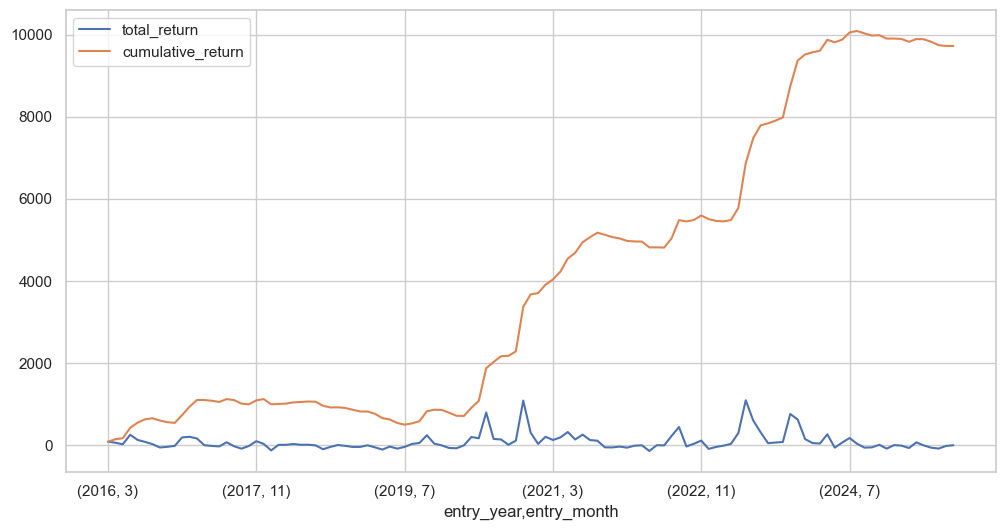

In [68]:
db.sql("""
       with cte as (
select year(entry_date) as entry_year, month(entry_date) as entry_month, sum(return) as total_return,        
        from merged
group by entry_year, entry_month
order by entry_year, entry_month
       )
       select entry_year, entry_month, total_return, 
       sum(total_return) over (order by entry_year, entry_month rows between unbounded preceding and current row) as cumulative_return
       from cte
       order by entry_year, entry_month
""").to_df().set_index(["entry_year", "entry_month"]).plot(figsize=(12,6))

In [12]:
merged[merged["hmm_cluster"].isnull()].sort_values("entry_date")

,Symbol,entry_date,entry_price,exit_date,exit_price,return,Close,plus_di,minus_di,adx,...,ema_30_ratio,ema_100_ratio,3_days_high,7_days_high,14_days_high,30_days_high,result,holding_days,kmeans_cluster,hmm_cluster


In [53]:
regime.sample(10)

,Date,kmeans_cluster,hmm_cluster
1092,2019-08-29,4,1
1625,2021-10-27,0,2
1979,2023-03-29,4,2
1203,2020-02-12,2,1
1393,2020-11-18,0,1
1787,2022-06-22,4,3
2244,2024-05-02,0,2
1839,2022-09-07,0,1
74,2015-07-06,2,0
1595,2021-09-14,0,2


In [54]:
regime[regime["Date"] == "2021-10-27 00:00:00"]

,Date,kmeans_cluster,hmm_cluster
1625,2021-10-27,0,2


In [28]:
regime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590 entries, 0 to 2589
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            2590 non-null   object
 1   kmeans_cluster  2590 non-null   int32 
 2   hmm_cluster     2590 non-null   int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 50.7+ KB


In [15]:
db.sql("""
SELECT  hmm_cluster,
       sum(case when result = 'profit' then 1 else 0 end) as profit_count,
       sum(case when result = 'loss' then 1 else 0 end) as loss_count,
        SUM(CASE WHEN return <= 0 THEN return ELSE 0 END) AS losses,
        SUM(CASE WHEN return > 0  THEN return ELSE 0 END) AS profits,
       from merged
       group by hmm_cluster
""").to_df()

,hmm_cluster,profit_count,loss_count,losses,profits
0,0.0,393.0,724.0,-2681.609677,3148.576753
1,4.0,7.0,13.0,-47.026812,327.763830
2,3.0,202.0,256.0,-1037.752524,3147.983417
3,2.0,545.0,745.0,-2832.464982,7657.744471
4,1.0,356.0,428.0,-1727.274842,3770.186554


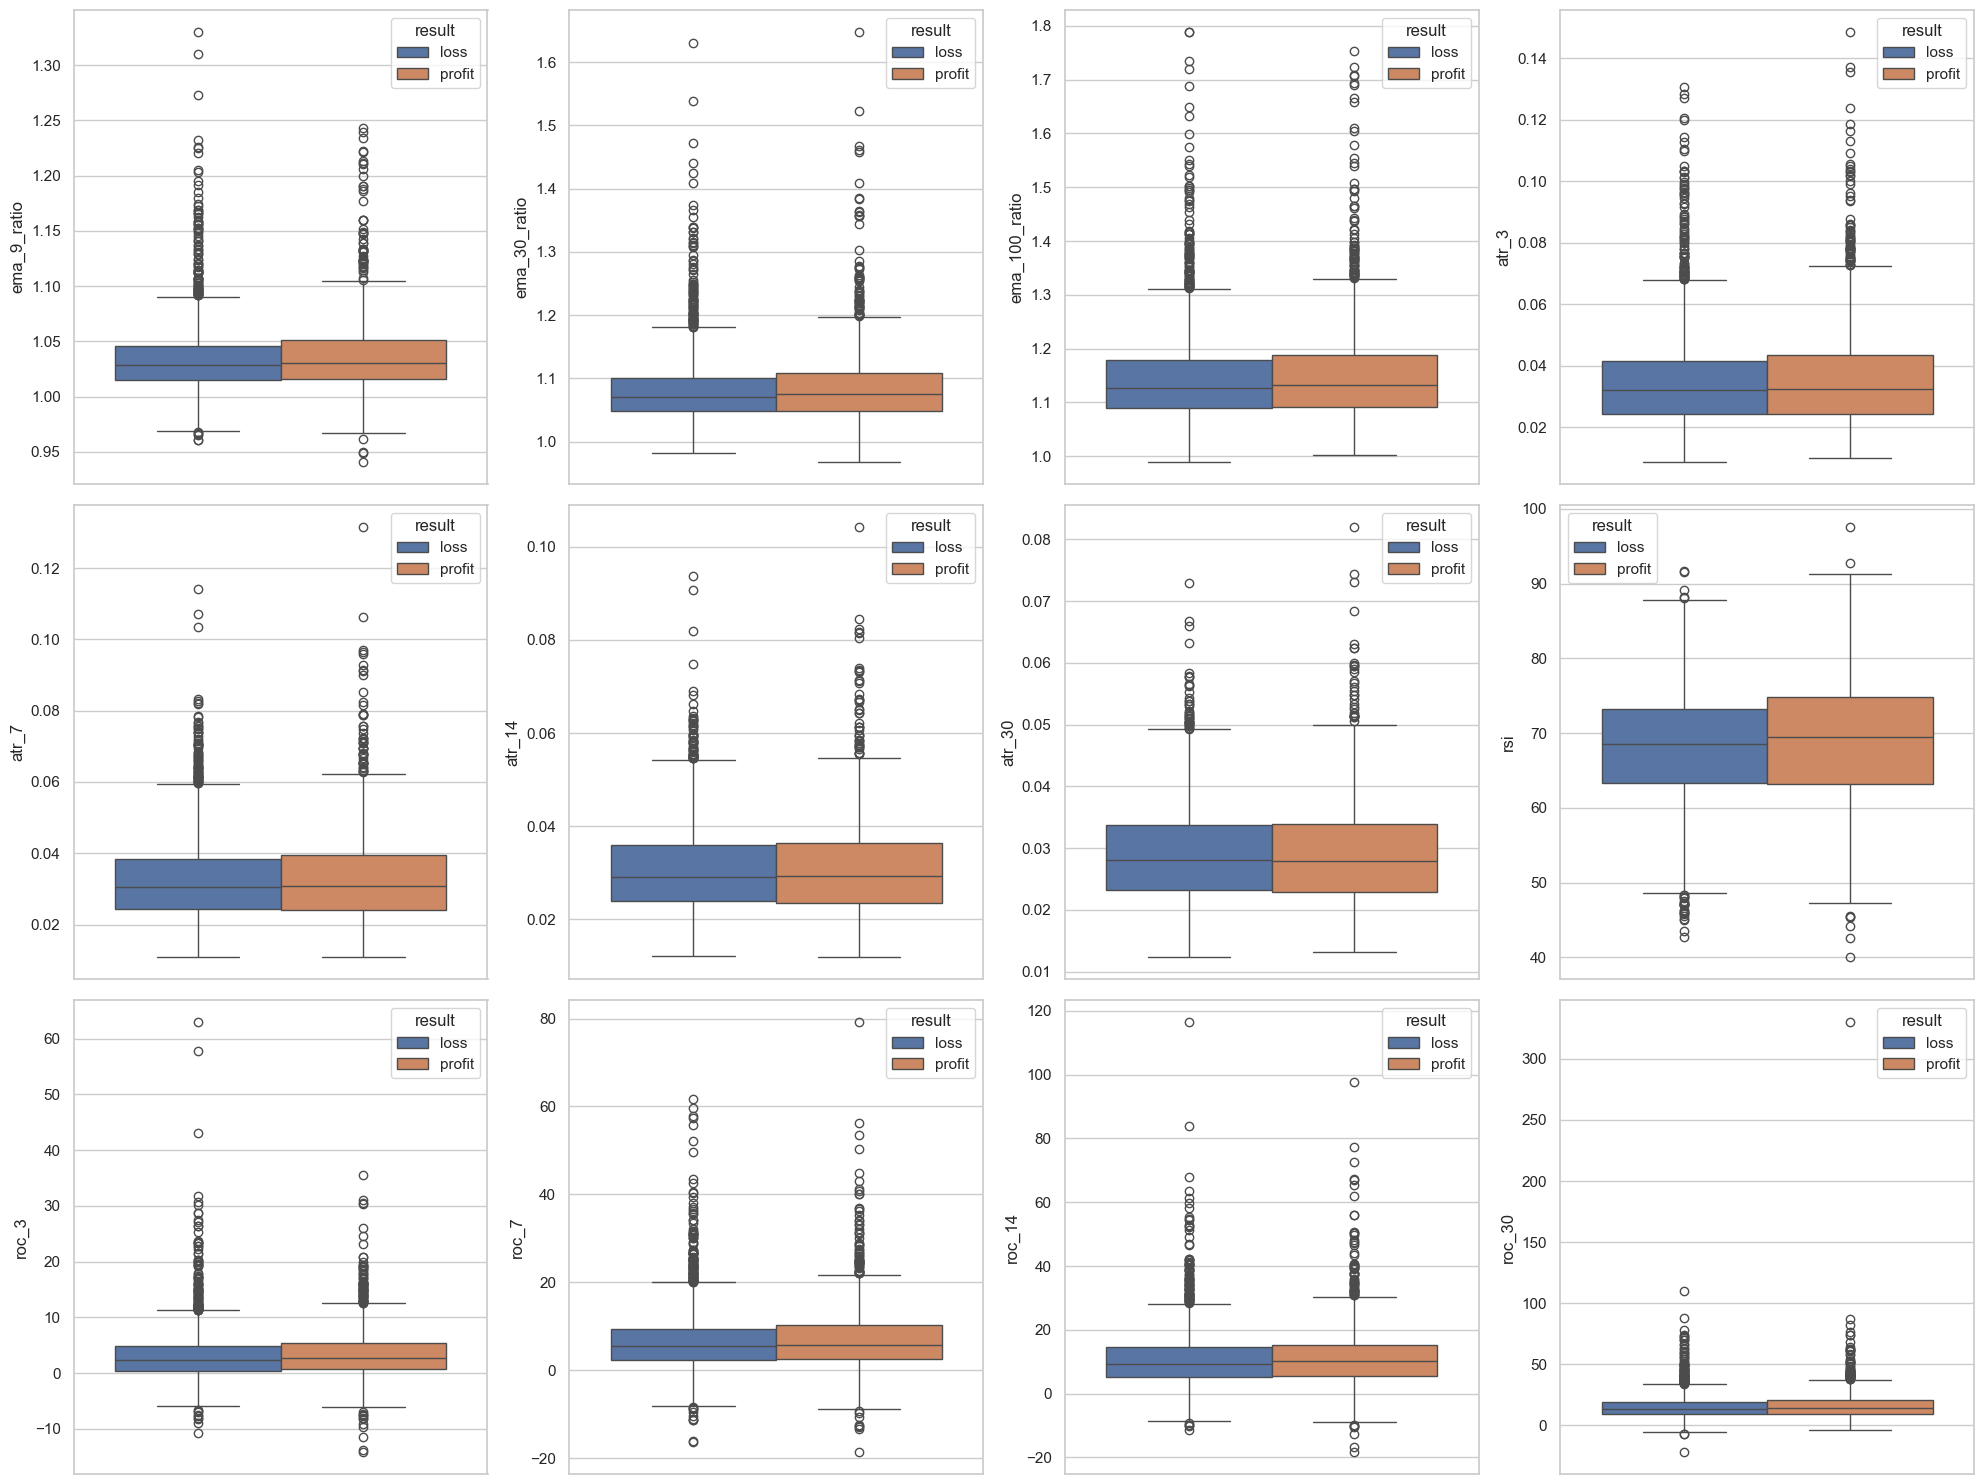

In [33]:
cols=[
       'return', 'plus_di', 'minus_di', 'adx', 'rsi', 'roc_3',
       'roc_7', 'roc_14', 'roc_30', 'atr_3', 'atr_7', 'atr_14', 'atr_30',
       'return_1d', 'return_3d', 'return_7d', 'return_14d', 'return_30d',
       'vol_3d', 'vol_7d', 'vol_14d', 'vol_30d', 'ema_9_ratio', 'ema_30_ratio',
       'ema_100_ratio', '3_days_high', '7_days_high', '14_days_high',
       '30_days_high']

fig, ax = plt.subplots(3,4, figsize=(20, 15))

sns.boxplot(y="ema_9_ratio", data=merged, hue="result", ax=ax[0,0]);
sns.boxplot(y="ema_30_ratio", data=merged, hue="result", ax=ax[0,1]);
sns.boxplot(y="ema_100_ratio", data=merged, hue="result", ax=ax[0,2]);
# atr_3
sns.boxplot(y="atr_3", data=merged, hue="result", ax=ax[0,3]);
sns.boxplot(y="atr_7", data=merged, hue="result", ax=ax[1,0]);
sns.boxplot(y="atr_14", data=merged, hue="result", ax=ax[1,1]);
sns.boxplot(y="atr_30", data=merged, hue="result", ax=ax[1,2]);
# rsi
sns.boxplot(y="rsi", data=merged, hue="result", ax=ax[1,3]);
# roc

sns.boxplot(y="roc_3", data=merged, hue="result", ax=ax[2,0]);
sns.boxplot(y="roc_7", data=merged, hue="result", ax=ax[2,1]);
sns.boxplot(y="roc_14", data=merged, hue="result", ax=ax[2,2]);
sns.boxplot(y="roc_30", data=merged, hue="result", ax=ax[2,3]);

plt.tight_layout()

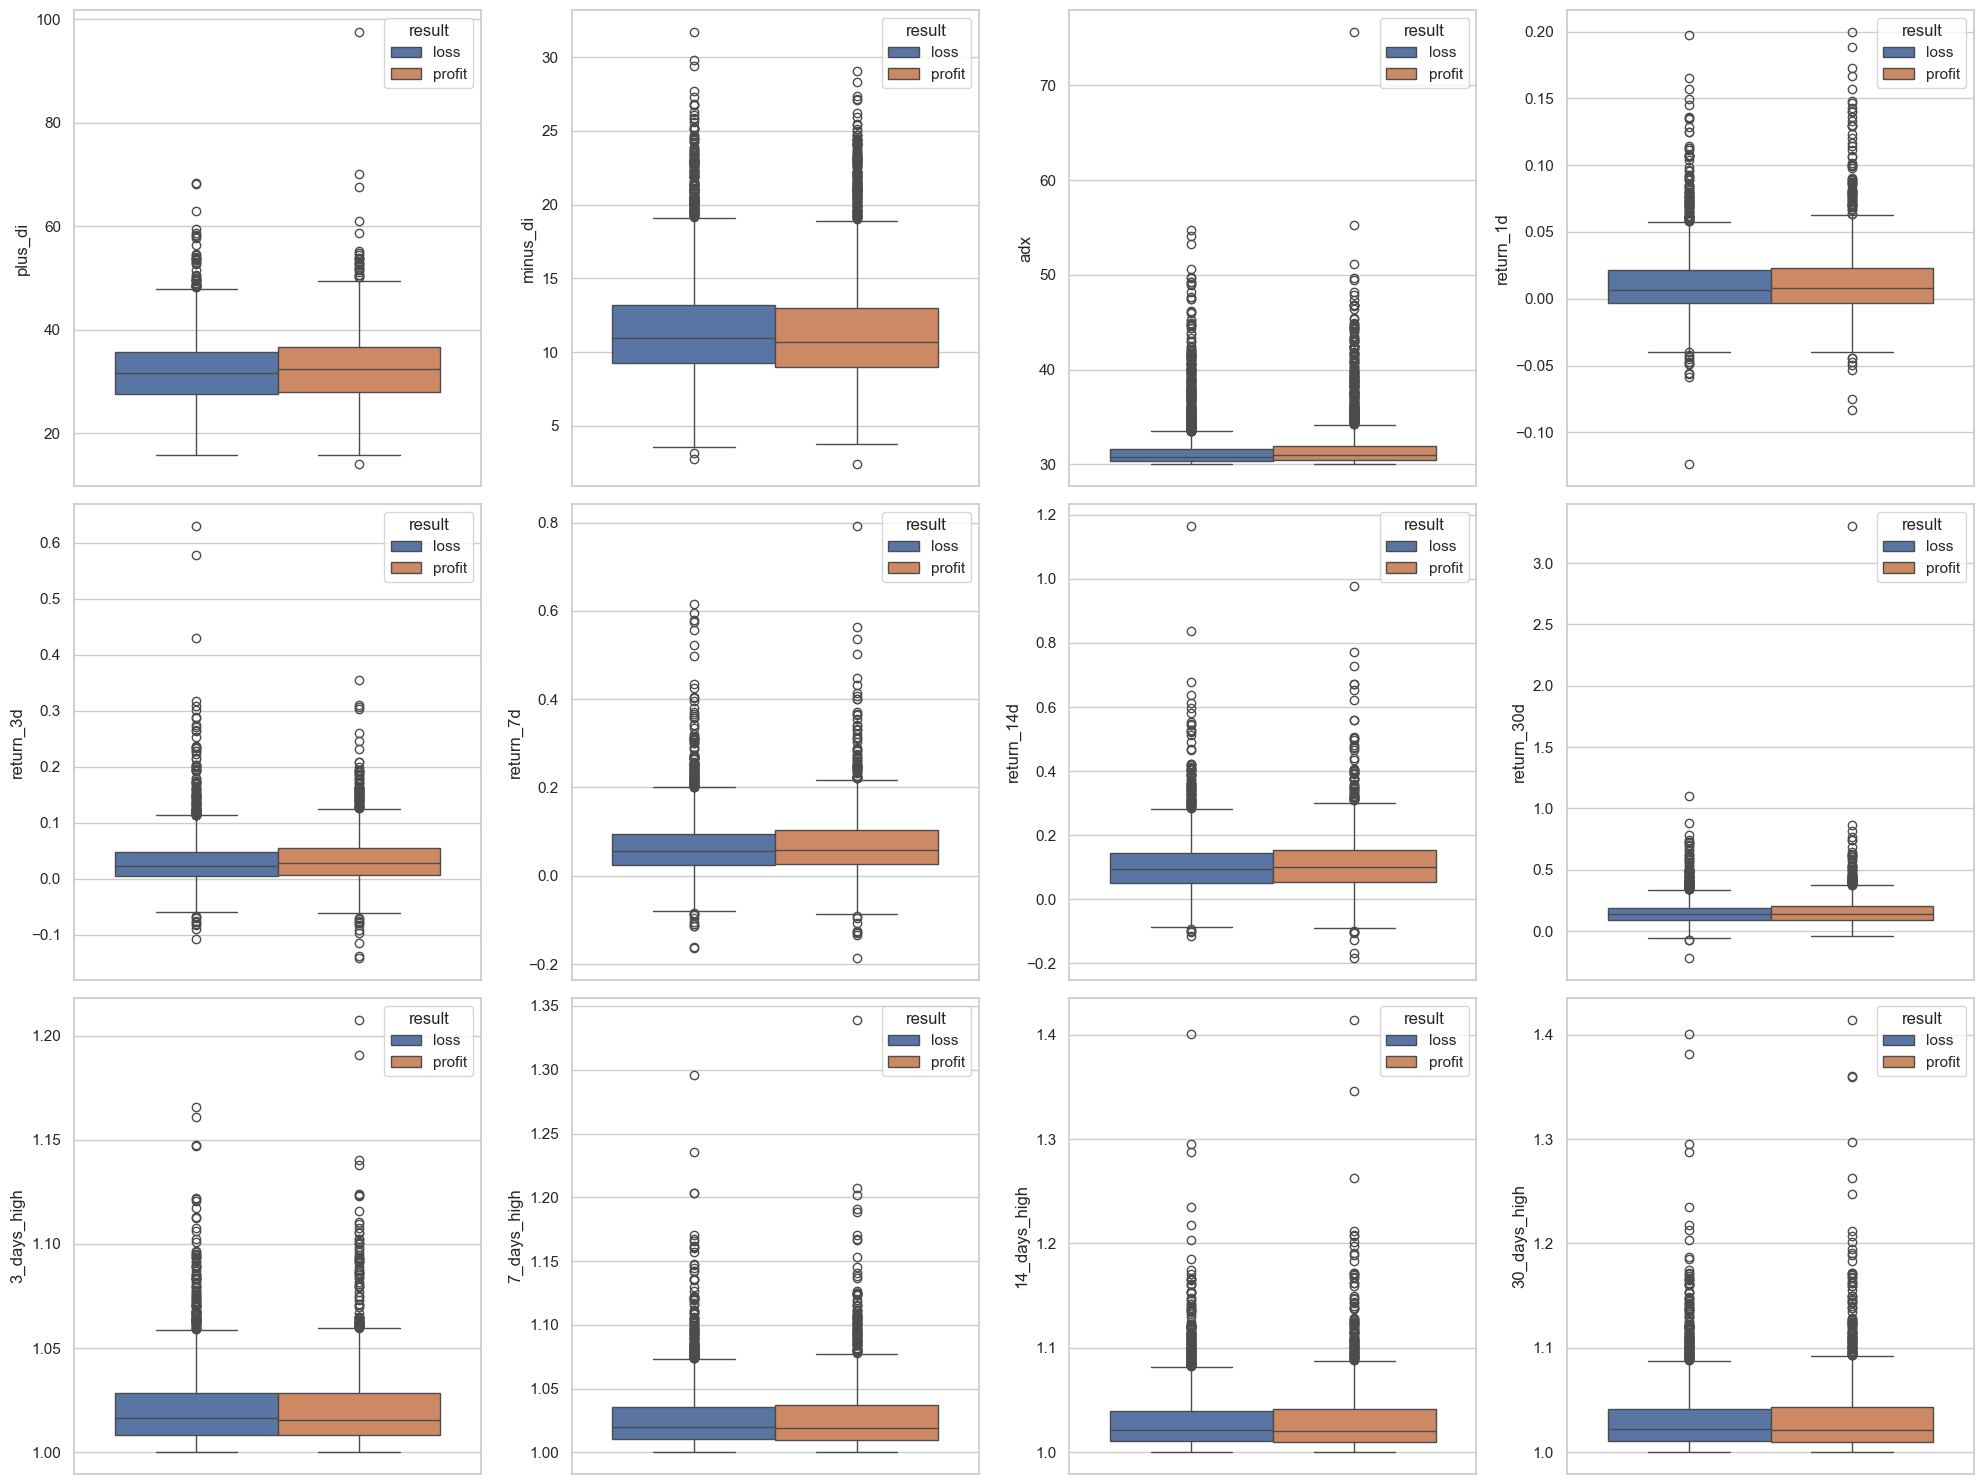

In [34]:
cols=[
       'return', 'plus_di', 'minus_di', 'adx', 'rsi', 'roc_3',
       'roc_7', 'roc_14', 'roc_30', 'atr_3', 'atr_7', 'atr_14', 'atr_30',
       'return_1d', 'return_3d', 'return_7d', 'return_14d', 'return_30d',
       'vol_3d', 'vol_7d', 'vol_14d', 'vol_30d', 'ema_9_ratio', 'ema_30_ratio',
       'ema_100_ratio', '3_days_high', '7_days_high', '14_days_high',
       '30_days_high']

fig, ax = plt.subplots(3,4, figsize=(20, 15))

sns.boxplot(y="plus_di", data=merged, hue="result", ax=ax[0,0]);
sns.boxplot(y="minus_di", data=merged, hue="result", ax=ax[0,1]);
sns.boxplot(y="adx", data=merged, hue="result", ax=ax[0,2]);
sns.boxplot(y="return_1d", data=merged, hue="result", ax=ax[0,3]);
sns.boxplot(y="return_3d", data=merged, hue="result", ax=ax[1,0]);
sns.boxplot(y="return_7d", data=merged, hue="result", ax=ax[1,1]);
sns.boxplot(y="return_14d", data=merged, hue="result", ax=ax[1,2]);
sns.boxplot(y="return_30d", data=merged, hue="result", ax=ax[1,3]);


sns.boxplot(y="3_days_high", data=merged, hue="result", ax=ax[2,0]);
sns.boxplot(y="7_days_high", data=merged, hue="result", ax=ax[2,1]);
sns.boxplot(y="14_days_high", data=merged, hue="result", ax=ax[2,2]);
sns.boxplot(y="30_days_high", data=merged, hue="result", ax=ax[2,3]);

plt.tight_layout()

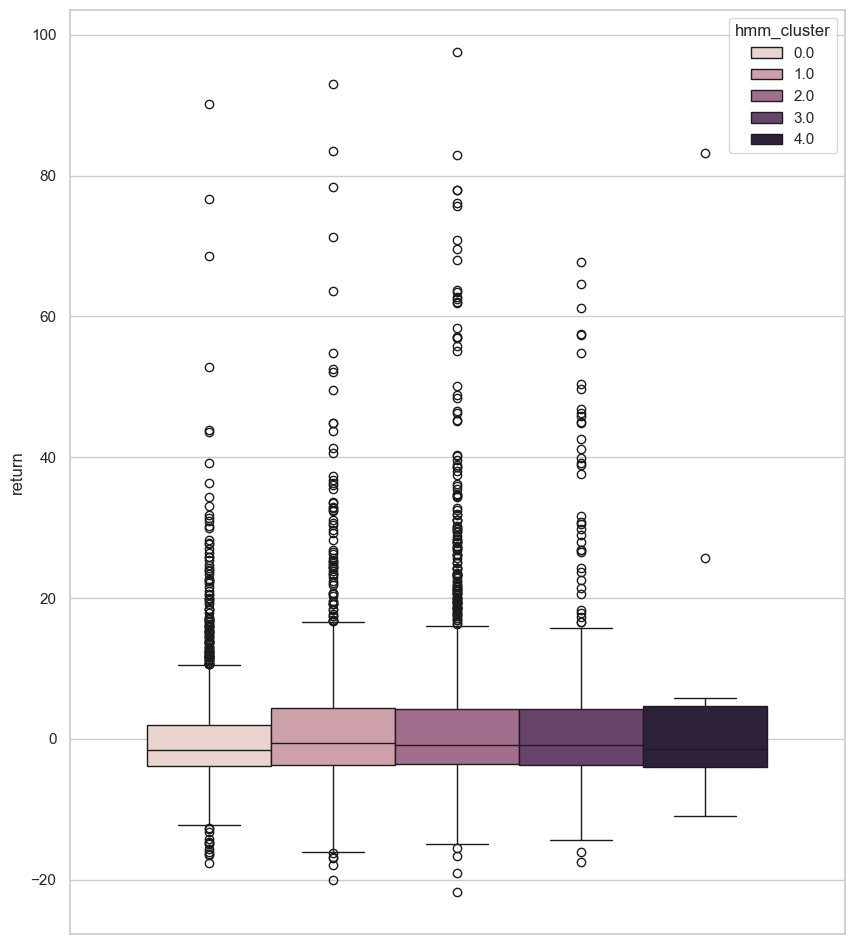

In [24]:
plt.figure(figsize=(10,12))
# merged["return"]
sns.boxplot(y="return", data=merged[(merged["return"]<100) & (merged["return"]>-25) ], hue="hmm_cluster");

In [50]:
merged.columns

Index(['Symbol', 'entry_date', 'entry_price', 'exit_date', 'exit_price',
       'return', 'Close', 'plus_di', 'minus_di', 'adx', 'rsi', 'roc_3',
       'roc_7', 'roc_14', 'roc_30', 'atr_3', 'atr_7', 'atr_14', 'atr_30',
       'return_1d', 'return_3d', 'return_7d', 'return_14d', 'return_30d',
       'vol_3d', 'vol_7d', 'vol_14d', 'vol_30d', 'ema_9_ratio', 'ema_30_ratio',
       'ema_100_ratio', '3_days_high', '7_days_high', '14_days_high',
       '30_days_high', 'macd', 'macd_signal', 'macd_hist', 'result',
       'holding_days', 'Industry', 'kmeans_cluster', 'hmm_cluster'],
      dtype='object')

In [51]:
merged["Industry"].value_counts()

Industry
Financial Services                790
Capital Goods                     361
Automobile and Auto Components    290
Information Technology            251
Healthcare                        244
Fast Moving Consumer Goods        228
Oil Gas & Consumable Fuels        212
Power                             199
Metals & Mining                   197
Consumer Services                 160
Realty                            139
Chemicals                         124
Consumer Durables                 121
Construction Materials            112
Services                           85
Telecommunication                  84
Construction                       51
Textiles                           21
Name: count, dtype: int64

In [20]:
df =merged.copy()

In [22]:
df["result"]
df["result"] = df["result"].map({"profit": 1, "loss": 0})

In [23]:
grouped = df.groupby("Industry")["result"].agg(["sum", "count"])
grouped.rename(columns={"sum": "success_count", "count": "total"}, inplace=True)
grouped["fail_count"] = grouped["total"] - grouped["success_count"]

# Step 2: Proportions
total_success = grouped["success_count"].sum()
total_fail = grouped["fail_count"].sum()

grouped["dist_success"] = grouped["success_count"] / total_success
grouped["dist_fail"] = grouped["fail_count"] / total_fail

# Step 3: WoE = log(success_dist / fail_dist)
# add smoothing to avoid divide-by-zero
eps = 1e-6
grouped["WoE"] = np.log((grouped["dist_success"] + eps) / (grouped["dist_fail"] + eps))

# Step 4: Map back to dataframe
df["Industry_woe"] = df["Industry"].map(grouped["WoE"])

In [24]:
df

,Symbol,entry_date,entry_price,exit_date,exit_price,return,Close,plus_di,minus_di,adx,...,30_days_high,macd,macd_signal,macd_hist,result,holding_days,Industry,kmeans_cluster,hmm_cluster,Industry_woe
0,ABB,2016-04-01,1130.375488,2016-05-04,1072.873291,-5.087000,1130.375488,30.314262,7.871093,30.230831,...,1.015792,0.036581,0.026990,0.009592,0,33,Capital Goods,2.0,1.0,0.092264
1,ABB,2017-04-11,1267.503418,2017-05-23,1273.588867,0.480113,1267.503418,38.091147,6.465750,32.571018,...,1.007805,0.036242,0.021145,0.015097,1,42,Capital Goods,2.0,0.0,0.092264
2,ABB,2018-01-15,1330.367676,2018-02-19,1306.259766,-1.812124,1330.367676,31.127918,9.259722,30.107032,...,1.006734,0.014370,0.008634,0.005736,0,35,Capital Goods,2.0,0.0,0.092264
3,ABB,2018-09-06,1142.333374,2018-10-03,1253.569824,9.737652,1142.333374,25.509846,15.018909,31.457567,...,1.053241,0.018352,0.019640,-0.001288,1,27,Capital Goods,2.0,0.0,0.092264
4,ABB,2019-04-10,1217.739868,2019-05-09,1225.911133,0.671019,1217.739868,28.033595,10.191537,31.081143,...,1.027107,0.020635,0.015897,0.004738,1,29,Capital Goods,2.0,0.0,0.092264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3664,ZYDUSLIFE,2023-04-18,504.088043,2023-05-02,505.113983,0.203524,504.088043,28.030868,7.307240,31.986264,...,1.005040,0.019131,0.016010,0.003121,1,14,Healthcare,0.0,2.0,-0.119259
3665,ZYDUSLIFE,2023-06-21,547.276001,2023-08-28,625.555908,14.303552,547.276001,34.441499,12.898958,30.845364,...,1.008391,0.021036,0.012053,0.008983,1,68,Healthcare,0.0,2.0,-0.119259
3666,ZYDUSLIFE,2023-08-29,623.238342,2023-08-30,619.441406,-0.609227,623.238342,15.770438,14.935649,38.176930,...,1.058232,0.011479,0.019841,-0.008362,0,1,Healthcare,0.0,2.0,-0.119259
3667,ZYDUSLIFE,2023-11-09,604.007141,2024-04-12,948.886414,57.098541,604.007141,31.486758,11.840640,30.410006,...,1.035186,-0.000721,-0.010215,0.009494,1,155,Healthcare,0.0,2.0,-0.119259


In [25]:
grouped.sort_values("WoE", ascending=False)

,success_count,total,fail_count,dist_success,dist_fail,WoE
Industry,,,,,,
Construction,28,51,23,0.018629,0.010619,0.562089
Consumer Services,73,160,87,0.048570,0.040166,0.189966
Consumer Durables,55,121,66,0.036593,0.030471,0.183092
Metals & Mining,89,197,108,0.059215,0.049861,0.171921
Chemicals,54,124,70,0.035928,0.032318,0.105905
Automobile and Auto Components,126,290,164,0.083832,0.075716,0.101833
Capital Goods,156,361,205,0.103792,0.094645,0.092264
Textiles,9,21,12,0.005988,0.005540,0.077723
Oil Gas & Consumable Fuels,89,212,123,0.059215,0.056787,0.041870


In [28]:
with open('../../data/trades.pickle', 'wb') as f:
    pickle.dump(df, f)